# **Prediction Using Unsupervised ML**

## 1. Importing all packages

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns
%matplotlib inline

from sklearn.cluster import KMeans

## 2.  Importing and extracting data 

In [ ]:
df=pd.read_csv("Iris.csv",index_col=0)#removing index
print("Data Imported")
df.head()

Data Imported


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


## 3. Determine best no.of clusters

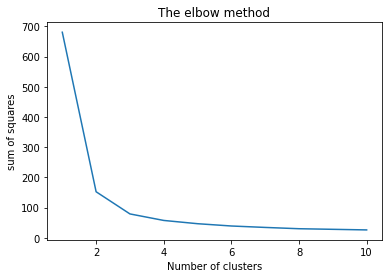

In [ ]:
# Finding the optimum number of clusters for k-means classification by elbow method

x = df.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
y = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    y.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), y)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('sum of squares') 
plt.show()

We choose cluster no. 3 as after that performance doesnt improve much

## 4. Making ML  / KMeans Classifier

### 4a) Make model

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

### 4c) Plotting result

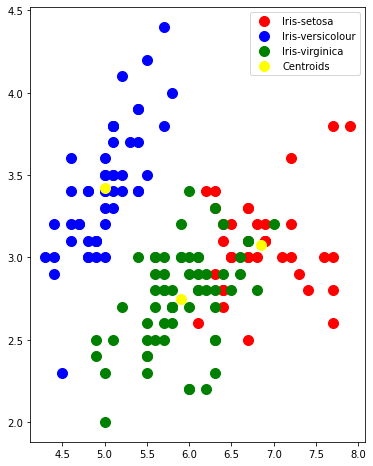

In [ ]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')
plt.rcParams["figure.figsize"] = (6,8)
plt.legend()

### Thank You